In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [3]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent','win','congragulations','!', 'approved']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [5]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

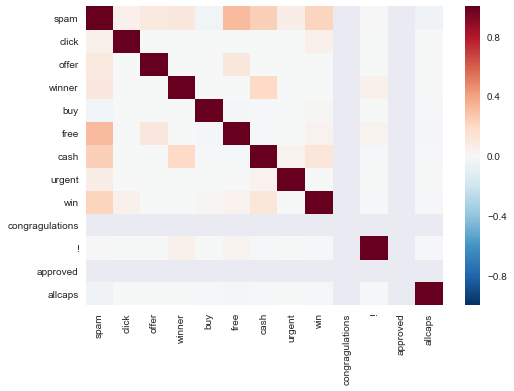

In [6]:
sns.heatmap(sms_raw.corr())

In [7]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 576


In [12]:
# Calculating accuracy
(target == y_pred).sum() / data.shape[0] * 100

89.662598707824841

In [14]:
# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4762,   63],
       [ 513,  234]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.90      0.99      0.94      4825
       True       0.79      0.31      0.45       747

avg / total       0.89      0.90      0.88      5572

